# Plot run data mined by run_summary.py
See https://github.com/aekiss/run_summary

In [1]:
import csv
import glob
import os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
import dateutil.parser
import itertools
import matplotlib.dates as mdates

In [2]:
basedir = '/g/data/hh5/tmp/cosima/access-om2-run-summaries/'

In [3]:
files = [basedir+'run_summary_01deg_jra55v13_iaf.csv']
files = files + (glob.glob(basedir+'run_summary_01deg_jra55v13_ryf8485_spinup[6-9].csv'))
files.append(basedir+'run_summary_01deg_jra55v13_ryf8485_spinup7_newexe.csv')
files.sort()
files2 = glob.glob(basedir+'run_summary_01deg_jra55v13_ryf8485_spinup1?.csv')
files2.sort()
files = files + files2
files

['/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_iaf.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup6.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup7.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup7_newexe.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup8.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup9.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup10.csv',
 '/g/data/hh5/tmp/cosima/access-om2-run-summaries/run_summary_01deg_jra55v13_ryf8485_spinup11.csv']

In [4]:
def num(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            try:
                return dateutil.parser.parse(s)       
            except ValueError:
                if len(s) == 0:
                    return None
                else:
                    return s

In [5]:
prefixlen = len(os.path.commonpath(files))+1
alldata = dict()
for f in files:
    with open(f) as csvfile:
        rows = csv.reader(csvfile)
        for i in range(4):
            next(rows)
        colnames = next(rows)  # assumes column headings are in row 5
        data = dict([(key, []) for key in colnames])
        for drow in csv.DictReader(csvfile, colnames):
            for k,v in data.items():                
                v.append(num(drow[k]))
    alldata[f[prefixlen:].split('run_summary_',1)[1].split('.csv',1)[0]] = data

In [6]:
colnames

['Run number',
 'Run start',
 'Run end',
 'Run length (years, months, days, seconds)',
 'Run length (days)',
 'Job Id',
 'Failed previous jobs',
 'Failed previous jobids',
 'Run completion date',
 'Queue',
 'Service Units',
 'Walltime Used (hr)',
 'SU per model year',
 'Walltime (hr) per model year',
 'Memory Used (Gb)',
 'NCPUs Used',
 'MOM NCPUs',
 'CICE NCPUs',
 'Fraction of MOM runtime in oasis_recv',
 'MOM tile layout',
 'CICE tile distribution',
 'Timestep (s)',
 'MOM barotropic split',
 'CICE dynamic split (ndtd)',
 'ktherm',
 'Common inputs',
 'Atmosphere executable',
 'Atmosphere inputs',
 'MOM executable',
 'MOM inputs',
 'CICE executable',
 'CICE inputs',
 'Payu version',
 'Git hash of run',
 'Commit date',
 'Git-tracked file changes since previous run',
 'Git log messages since previous run',
 'accessom2.nml -> accessom2_nml -> ice_ocean_timestep',
 'accessom2.nml -> date_manager_nml -> restart_period',
 'ice/cice_in.nml -> setup_nml -> istep0',
 'ice/cice_in.nml -> setup_n

In [7]:
marker = itertools.cycle(('*', '^', 'v', '>', 's', 'o', 'D', 'H')) 

# keys xk, yk can be any string in colnames
def plotem(xk, yk):
    plt.figure(figsize=(12,6))
    for fn,v in alldata.items():
        plt.scatter(v[xk], v[yk], marker=next(marker), label=fn, alpha=0.3, s=[3+x/3 for x in v['Run number']]) #, facecolors='none')  #fillstyle='none')
    plt.xlabel(xk)
    plt.ylabel(yk)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)    

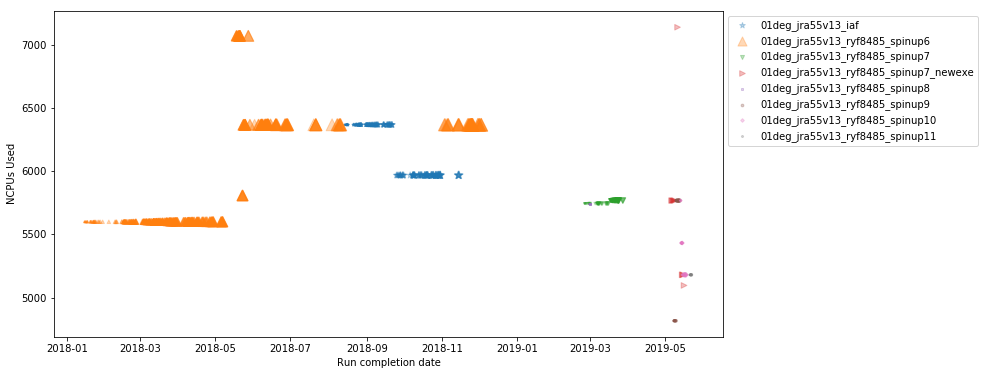

In [8]:
plotem('Run completion date', 'NCPUs Used')

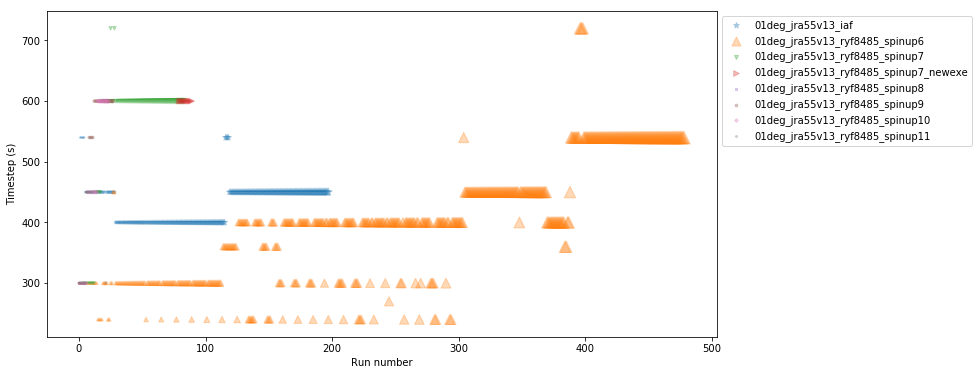

In [9]:
plotem('Run number', 'Timestep (s)')

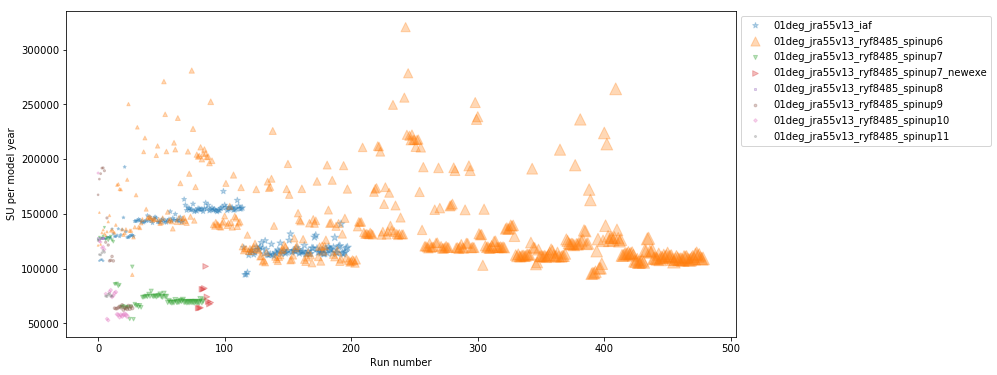

In [10]:
plotem('Run number', 'SU per model year')

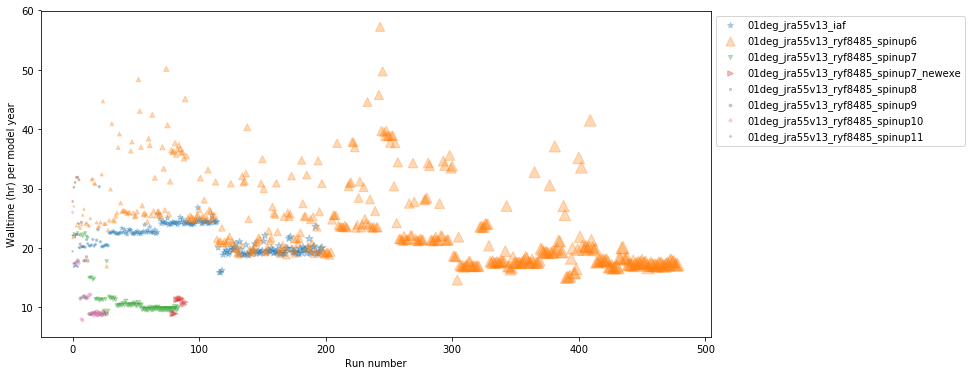

In [11]:
plotem('Run number', 'Walltime (hr) per model year')

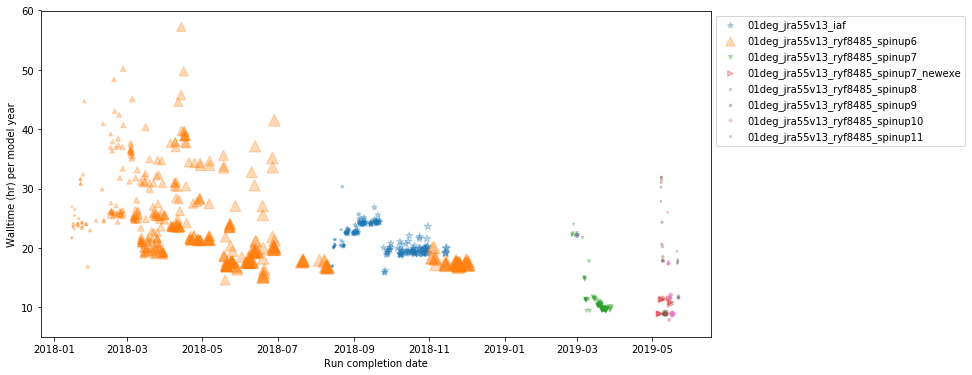

In [12]:
plotem('Run completion date', 'Walltime (hr) per model year')

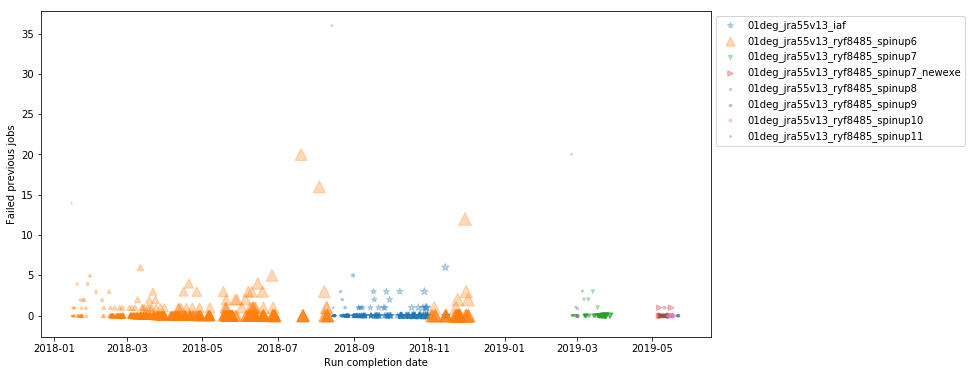

In [13]:
plotem('Run completion date', 'Failed previous jobs')

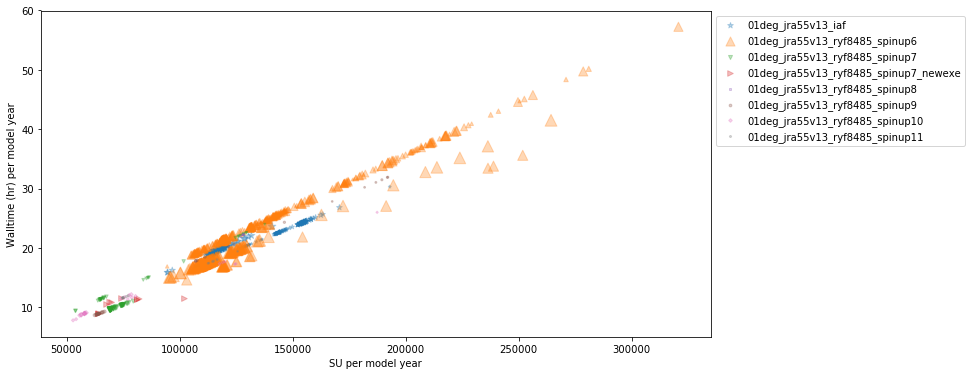

In [14]:
plotem('SU per model year', 'Walltime (hr) per model year')

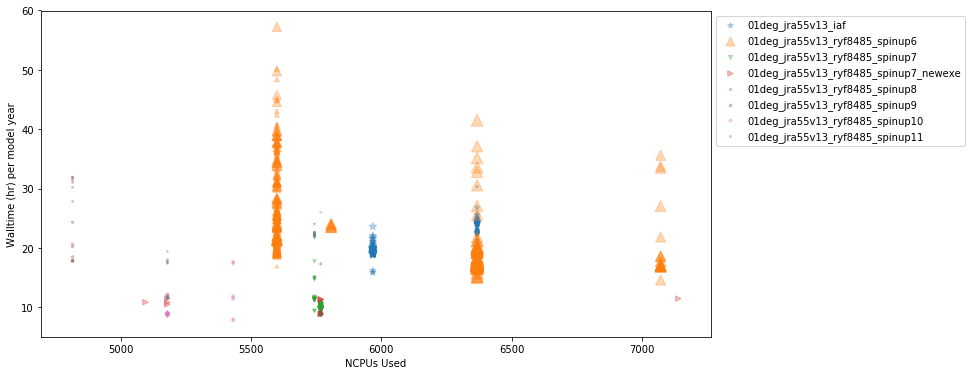

In [15]:
plotem('NCPUs Used', 'Walltime (hr) per model year')

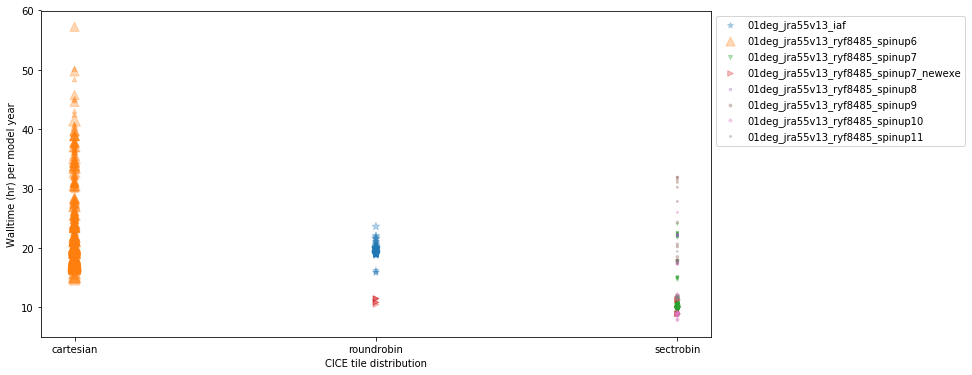

In [16]:
plotem('CICE tile distribution', 'Walltime (hr) per model year')

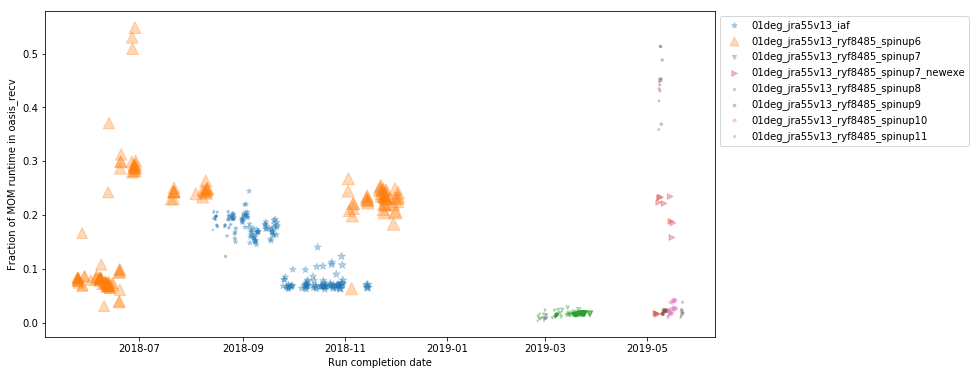

In [17]:
plotem('Run completion date', 'Fraction of MOM runtime in oasis_recv')

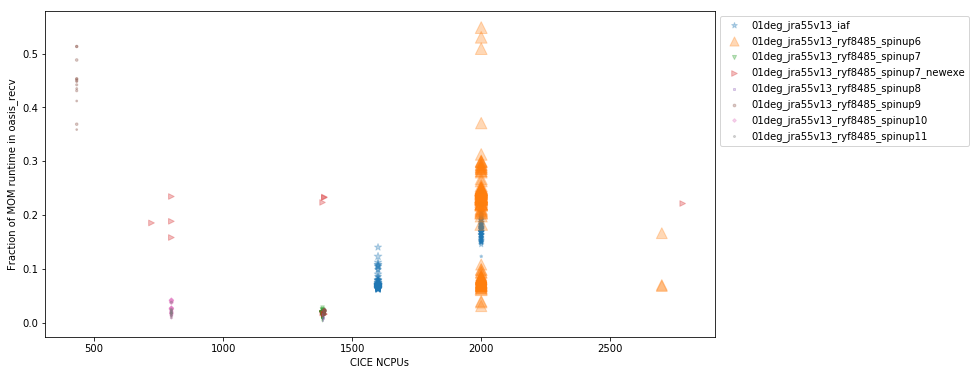

In [18]:
plotem('CICE NCPUs', 'Fraction of MOM runtime in oasis_recv')

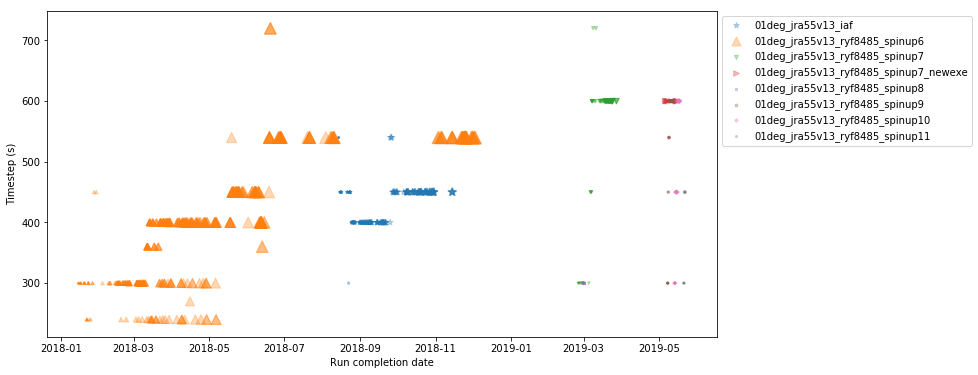

In [19]:
plotem('Run completion date','Timestep (s)')

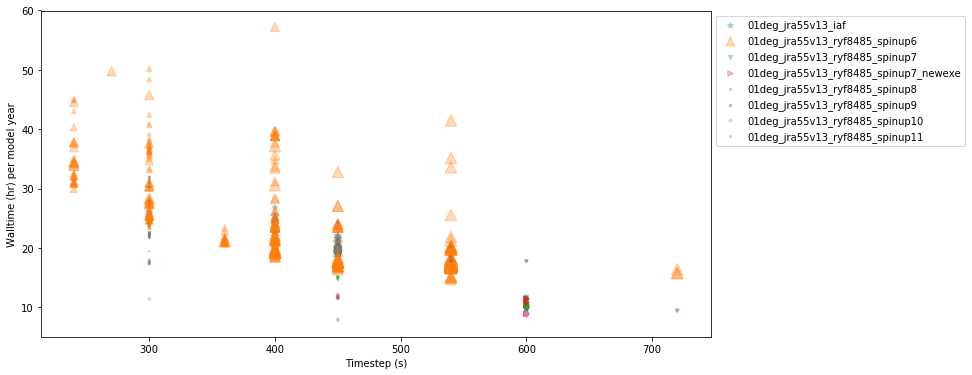

In [20]:
plotem('Timestep (s)', 'Walltime (hr) per model year')

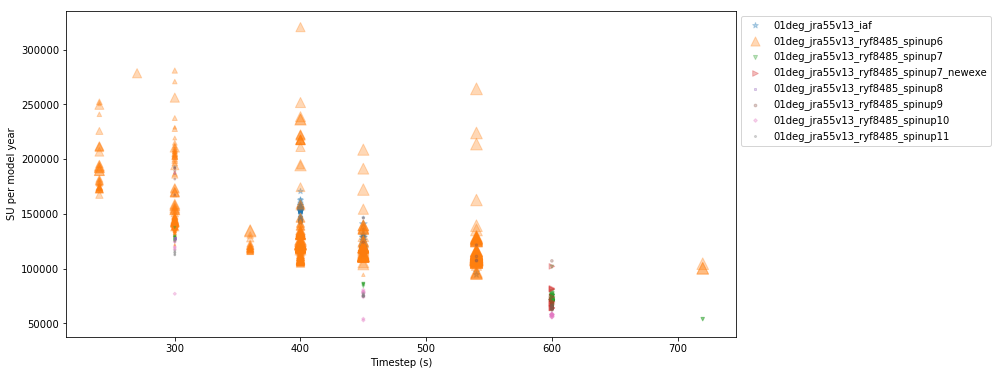

In [21]:
plotem('Timestep (s)', 'SU per model year')

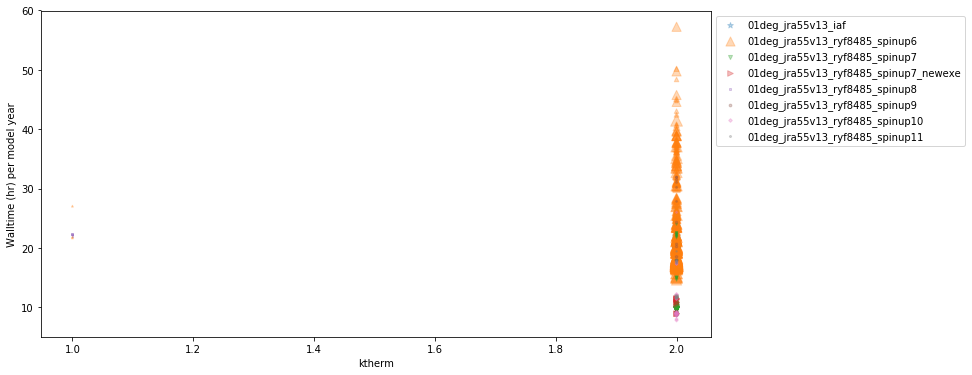

In [22]:
plotem('ktherm', 'Walltime (hr) per model year')

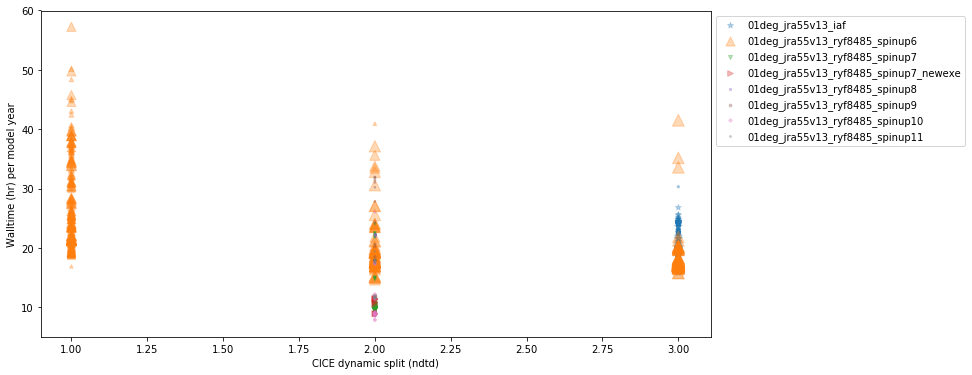

In [23]:
plotem('CICE dynamic split (ndtd)', 'Walltime (hr) per model year')

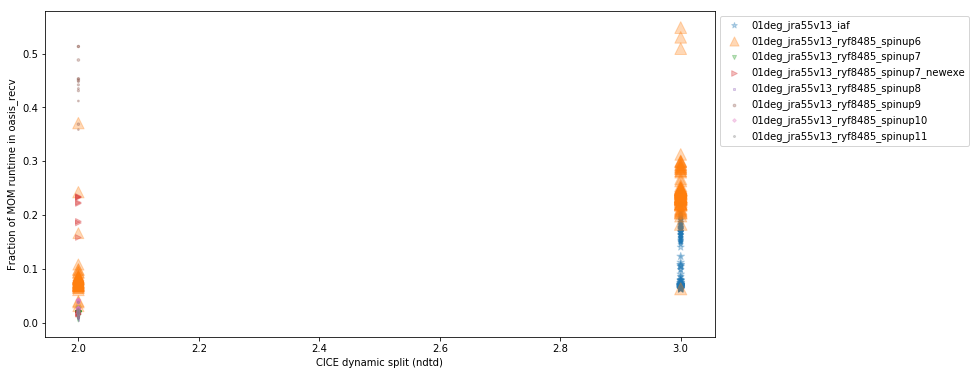

In [24]:
plotem('CICE dynamic split (ndtd)', 'Fraction of MOM runtime in oasis_recv')

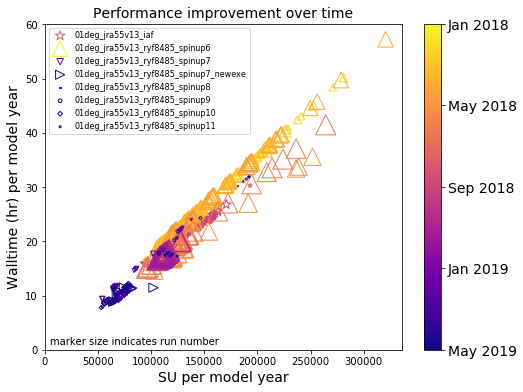

In [25]:
xk,yk,zk,sk = 'SU per model year', 'Walltime (hr) per model year', 'Run completion date', 'Run number'
fig, ax = plt.subplots(figsize=(8,6))
minz = min([min(v[zk]) for v in alldata.values()])
maxz = max([max(v[zk]) for v in alldata.values()])
scale = max([max([(d-minz).total_seconds() for d in v[zk]]) for v in alldata.values()])
# see https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html
cmap = mpl.cm.get_cmap('plasma_r')
normalize = mpl.colors.Normalize(vmin=0, vmax=1)

for fn,v in alldata.items():
    z = [(d-minz).total_seconds()/scale for d in v[zk]]
    colors = [cmap(normalize(value)) for value in z]
    sc = plt.scatter(v[xk], v[yk], marker=next(marker), s=v[sk], edgecolors=colors, facecolors='none', label=fn, alpha=1)
plt.xlabel(xk, fontsize=14)
plt.ylabel(yk, fontsize=14)
plt.title('Performance improvement over time', fontsize=14)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1, fontsize=8)    
plt.xlim([0,None])
plt.ylim([0,None])
ax.annotate('marker size indicates run number', xy=(5000,1)) #, xytext=(0,0))
            
cbticks = [0, 0.25, 0.5, 0.75, 1]
cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize, ticks=cbticks)
cbar.ax.set_yticklabels([d.strftime("%b %Y") for d in [minz+s*(maxz-minz) for s in cbticks]], fontsize=14)
cbar.ax.invert_yaxis()

plt.savefig('Walltime_SU_vs_date.pdf')